<a href="https://colab.research.google.com/github/vkurpmax/Manipulator-Robot/blob/main/Test/sklearn_and_statsmodel_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


We begin with the standard imports:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = a + b(x)
$$
where $b$ is commonly known as the *slope*, and $a$ is commonly known as the *intercept*.

Consider the following data

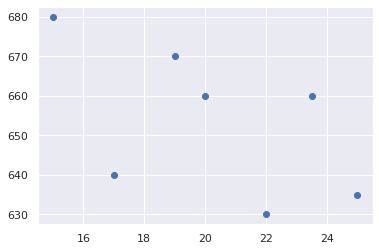

In [ ]:
x = np.array([15, 17, 19, 20, 22, 23.5, 25])
y = np.array([680, 640, 670, 660, 630, 660, 635])
plt.scatter(x, y);

#sklearn

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

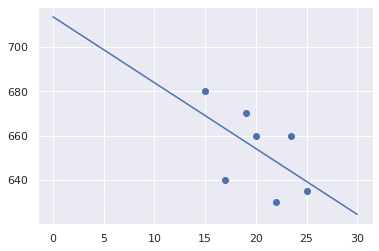

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 30, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     -2.968015051740358
Model intercept: 713.5677328316086


#Statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
x = np.array(x).T
x = sm.add_constant(x)
results = sm.OLS(endog=y, exog=x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.280
Date:                Fri, 10 Jun 2022   Prob (F-statistic):              0.191
Time:                        14:39:02   Log-Likelihood:                -28.640
No. Observations:                   7   AIC:                             61.28
Df Residuals:                       5   BIC:                             61.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        713.5677     40.258     17.725      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
